# Home Assignment No. 2: Part 1 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

## Task 1.1. Boosting, part 1. (2 points)


> Boosting Machines (BM) are a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, that perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is acheived by reweighting the training samples during each algorithm's step. 

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in [Lecture 7](https://github.com/adasegroup/ML2020_lectures).

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your_accuracy} - \text{sklearn_accuracy}| \leq 0.005
\,. $$

#### Place for ypur solution

In [1146]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [1147]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [1148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

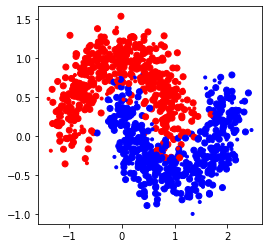

In [1149]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)

base classifier

In [1150]:
from sklearn.tree import DecisionTreeClassifier

* `ada_boost_alpha` - function, which calculates the weights of the linear combination of the classifiers
* `ada_boost_distribution` - function, which calculates sample weights

Implement htese procedures

In [1151]:
### Now let us define functions to calculate alphas and distributions for AdaBosot algorithm

def ada_boost_alpha(y, y_pred_t, distribution):
    """
    y_pred_t is a prediction of the t-th base classifier
    """
    error = distribution.dot(y_pred_t!=y)
    alpha = 0.5*np.log((1-error)/error)
    if (alpha==np.inf or alpha>=500.0):
        return 500.0
    return alpha

In [1152]:
def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    y_pred_t is a prediction of the t-th base classifier
    """
    distribution = distribution*np.exp(-alpha_t*y*y_pred_t)
    return distribution

Our custom boosting class

In [1153]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier()) 
            self.classifiers[-1].fit(X, y, sample_weight=distribution)
            

            # ======= Your code here ======
            
            # make a prediction
            y_pred = self.classifiers[-1].predict(X)
            
            #update alphas, append new alpha to self.alphas
            alpha = ada_boost_alpha(y, y_pred, distribution)
            self.alphas.append(alpha)
            
            # update distribution and normalize
            distribution = ada_boost_distribution(y, y_pred, distribution, alpha)
            distribution = distribution / distribution.sum()
            
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        # ====== Your code here ======
        #get the weighted votes of the classifiers
        for alpha, clf in zip(self.alphas, self.classifiers):
            final_predictions += alpha*clf.predict(X)
        out = np.sign(final_predictions)
        return out

In [1166]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 50

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost1 = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost1.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [1167]:
classifiers = [ada_boost1, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.965
accuracy ada_boost_sklearn: 0.965


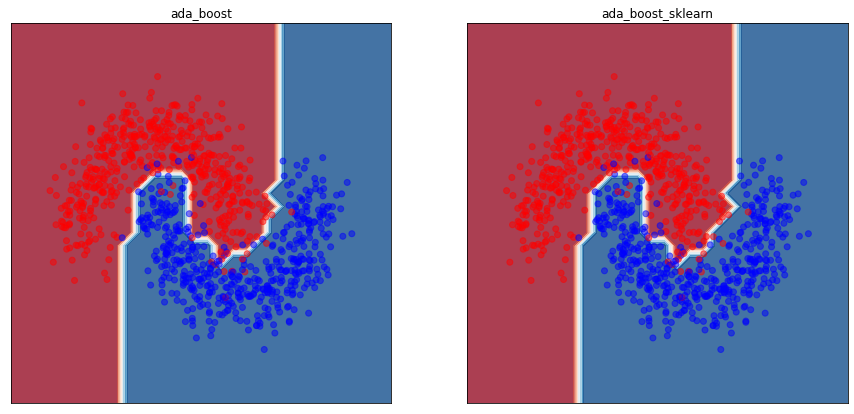

In [1168]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 1.2. Boosting, part 2. (2 points)

For adaboost we have computed each alpha according to the formula:

$$\alpha_t = \frac{1}{2}\log{\frac{1-N_T(h_T, w_T )}{N_T(h_T,w_t)}}$$

In the next task you will be asked to instead recompute all of the alphas after adding another estimator to the composition of models, i.e. when the new classifier is fitted to the weighted data samples, the new alphas should be recomputed by directly minimizing the exponential loss, for all the avaliable estimators. Take into account, that at each step of the boosting algorithm **all** alphas and, consequntly, **all** sample weights should be recomputed from scratch. 

**The task**:
* Complete the `recompute_alpha` and `recompute_distribution` functions
* Complete the `.fit` method of `RecomputeBoosting` class
* Complete the `.predict` method of `RecomputeBoosting` class
* Plot the final alphas (last calculated in case of recomputed alphas)
* plot the history scores of the resulting model at each iteration (use ```predict```, ```score``` and ```construct_alpha_history``` functions defined below) for both RecomputedBoosting and AdaBoost (it can be either your own implementation from Exercise 1.1 or the one from sklearn - in this case use ```.estimator_weights_```, ```.estimators_```)
* Make a conclusion about which method is better and in which case - in order to do that you can additionally vary the parameters of training: number and depth of the estimators, noise of the data (moons)

**HINTS:**

In order to minimize the exponential loss with respect to alpha, use the [```scipy.optimize.minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function.

When defining the function to minimize (in case of AdaBoost it should be the exponential loss), have a look at the optimization problem formulation of Ridge Regression and at the reguralization parameter([Lecture 2, slide 14](https://github.com/adasegroup/ML2020_lectures/blob/master/lecture2/Lecture_2_Regression.pdf)). Add it in order to guarantee the existence of the solution.

In [1169]:
from scipy.optimize import minimize

In [1170]:
def recompute_alpha(y, y_pred, C):
    """
    y_pred - is a list of predictions of the existing estimators
    C - is a reguralization term    
    """
    # ====== Your code here =====
    err = np.sum(y_pred!=y)/len(y)
    func = lambda x: np.exp(-x) * (1 - err) + np.exp(x) * err + C * np.linalg.norm(x, 2)**2
    alpha = minimize(func, x0 = 0)
    return alpha.x
    

def recompute_distribution(y, y_pred, alphas):
    """
    y_pred - is a list of predictions of the existing estimators
    alphas - are the last recomputed alphas
    """
    # ====== Your code here =====
    distribution = np.exp(-alphas*y*y_pred)
    return distribution

In [1171]:
class RecomputedBoosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=recompute_alpha, update_distribution=recompute_distribution, C=1.0):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        self.C = C
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []

        #notice how alpha is a matrix - we will store the history of the updates here
        self.alphas = np.zeros((n_estimators, n_estimators))
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())
            self.classifiers[-1].fit(X, y, sample_weight=distribution) 
            # ======= Your code here ======
            
            # create a list of predictions across all classifiers
            y_pred = []
            distribution = np.ones(n_samples, dtype=float) / n_samples
            for j in range(len(self.classifiers)):
                y_pred.append(self.classifiers[j].predict(X))
            
            # recalculate alphas, add them to the matrix of self.alphas 
            # NOTE: here, self.alphas is a history of computed alphas at each step i
                self.alphas[i,j] = recompute_alpha(y, y_pred[j], self.C)
            # update distribution and normalize
                distribution = distribution*recompute_distribution(y, y_pred[-1], self.alphas[i,j])
                distribution = distribution / distribution.sum()



    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
        # ====== Your code here ======
        #get the weighted votes of the classifiers
        #do not forget that self.alphas is the whole history of recalculated alphas!
        for alpha, clf in zip(self.alphas[-1] , self.classifiers):
            final_predictions += alpha*clf.predict(X)
        out = np.sign(final_predictions)

   
        return out

In [1172]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = RecomputedBoosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf, get_alpha=recompute_alpha, 
                     update_distribution=recompute_distribution, C=1.0)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [1173]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.965
accuracy ada_boost_sklearn: 0.965


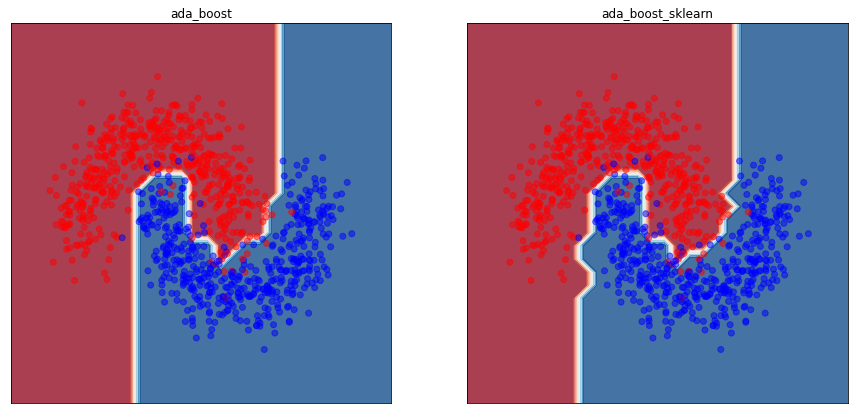

In [1174]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

In [1175]:
from sklearn.metrics import accuracy_score

def score(alphas, estimators, X, y):
    return accuracy_score(y, predict(alphas, estimators, X))

def predict(alphas, estimators, X, y=None):
    return np.sign(sum(
        b * e.predict(X) for b, e in zip(alphas, estimators)
    ))

def construct_alpha_history(init_alphas):
    """
    construct alpha history, alike recomputed alpha history, for AdaBoost algorithm
    """
    alphas = np.zeros((len(init_alphas), len(init_alphas)))
    for t, alpha in enumerate(init_alphas):
        alphas[t:, t] = alpha
    return alphas

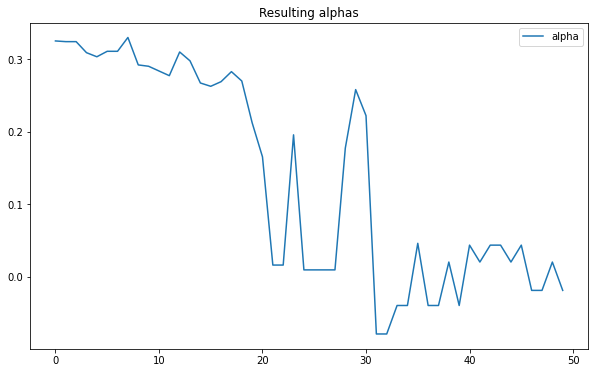

In [1176]:
## Plot the resulting alphas (last calculated in case of recomputed alphas)
alphas = construct_alpha_history(ada_boost.alphas[-1, :])

plt.figure(figsize=(10,6))
plt.title('Resulting alphas')
plt.plot(alphas[-1], label='alpha')

plt.legend(loc='best')
plt.show()

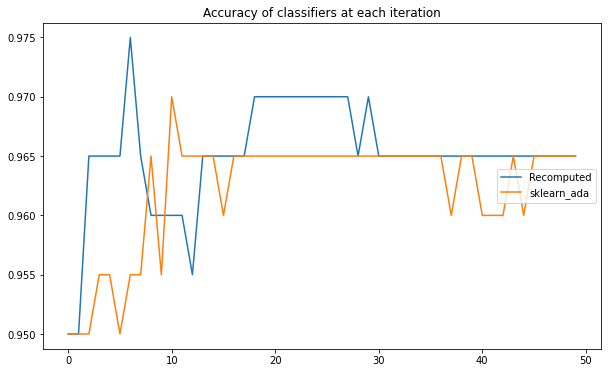

In [1177]:
## Plot the scores of the models at each iteration (each iteration - each estimator added to the ensemble) 
## for AdaBoost and RecomputedAdaBoost
estimators = ada_boost.classifiers

scores = [score(alphas=alphas[i], estimators=estimators, X=X_test,y=y_test)
         for i in range(len(ada_boost.classifiers))]

plt.figure(figsize=(10,6))
plt.plot(scores, label='Recomputed')
plt.plot(list(ada_boost_sklearn.staged_score(X_test, y_test)), label='sklearn_ada')
plt.title('Accuracy of classifiers at each iteration')
plt.legend(loc='right')
plt.show()

Make a conclusion about which method is better and in which case. 

Your answer

AdaBoost tend to be sensitive to outliers. As we can see, adding regularization term to the alphas calculator helped us to achieve more accuracy by not taking into account many outliers caused by noise(recalculating weights every loop from scratch).Having played with noise, n_etimators and max_depth parameters I can say that recomputed method can be suitable obly if the data has much noise or the data-points are intersecting. Otherwise, classic Adaboost would perform better.

## Task 2. Gradient Boosting and Feature Selection (1 point)

Gradient Boosting Machines (GBM) are a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are the extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one varinat of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterwards, compare the models' feature importances. 

**The task**
* train the XGBoost classifier on the provided dataset
  * measure the training time
  * measure the precision/recall on the test set
  * plot ROC-curve

* train Random Forest classifier and compare it to XGBoost (plot ROC-curve)

* compare the feature importances of the trained XGBoost and Random Forest Classifiers. Why do you think they are different? Explain.

* for each model, sort the features by their importance, and plot the dependence of the test score on the number of features selected by best importance

*Fit the models to the iteratively reduced subset of features -in order to fo that, firstly, sort the feature importances in the decreasing order; then fit the models on the iteratively reduced feature subsets corresponding to the currently chosen threshold of the feature importance and plot the precision-recall.

**HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and  its ```.transform``` methods in order to get the new $X$,$y$ subsets (according to the current threshold of the feature importance).

Make sure that you have installed the XGBoost package before starting the task. 

**HINT**: in order to measure the training time you can use [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [657]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the precision/recall on the test set
* plot ROC-curve
* train Random Forest classifier and compare it to XGBoost (plot ROC-curve)

XGboost time: 
97.1 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Random Forest time: 
137 ms ± 3.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Scores:
sgboost score:  0.549807931854968
Random forest score 0.5368918555062533


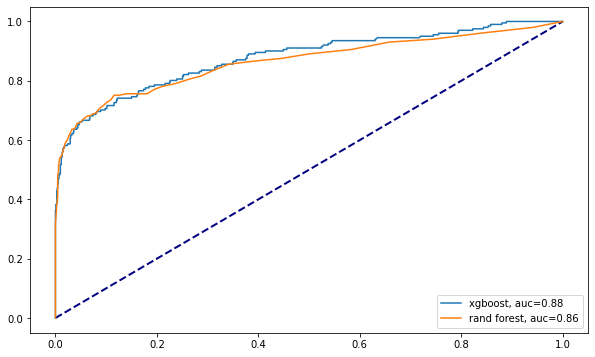

In [658]:
###YOUR CODE###
from sklearn.metrics import average_precision_score, roc_curve, auc, roc_auc_score

xgbc = XGBClassifier(n_jobs=-1)
print('XGboost time: ')
%timeit xgbc.fit(X_train, y_train)
xgbc_score = average_precision_score(y_test, xgbc.predict(X_test))
rf = RandomForestClassifier(n_jobs=-1)
print()
print('Random Forest time: ')
%timeit rf.fit(X_train, y_train)
rf_score = average_precision_score(y_test, rf.predict(X_test))
print()
print('Scores:')
print('sgboost score: ',xgbc_score)
print('Random forest score', rf_score)
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

y_pred_proba_xgbc = xgbc.predict_proba(X_test)[::,1]
y_pred_proba_rf = rf.predict_proba(X_test)[::, 1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_xgbc)
fpr_, tpr_, _ = roc_curve(y_test,  y_pred_proba_rf)

auc = roc_auc_score(y_test, y_pred_proba_xgbc)
auc_ = roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr,tpr,label="xgboost, auc=%.2f" % (auc))
plt.plot(fpr_,tpr_,label="rand forest, auc=%.2f" % (auc_))
plt.legend(loc=4)
plt.show()

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

In [662]:
from IPython.display import display

features_tab = pd.DataFrame(index = X.columns)
features_tab['xgb'] = xgbc.feature_importances_
features_tab['rf'] = rf.feature_importances_

features_tab = features_tab.sort_values(by = ['xgb'], ascending = False)
display(features_tab)

xgb        rf
customer service calls  0.223674  0.108114
total day minutes       0.190709  0.154639
number vmail messages   0.143069  0.044311
total eve minutes       0.105586  0.075294
total intl calls        0.093081  0.030854
total intl minutes      0.064962  0.051129
total night minutes     0.042754  0.047135
account length          0.038534  0.045939
total night calls       0.035613  0.045409
total day calls         0.031754  0.043651
total eve calls         0.030265  0.041526
total day charge        0.000000  0.142498
total eve charge        0.000000  0.080349
total night charge      0.000000  0.043037
total intl charge       0.000000  0.046116

As we see, a benefit of using gradient boosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each attribute.
Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

In case of Random FOrest, the importance of a feature is the (normalized) total reduction of the criterion brought by that feature: for each split in a tree RF gets how much it decreases Gini index and then take sum of this values over all splits of the feature over all trees.

Thus, GB tends to zero unimportant features more hardly.

* Fit the models to the iteratively reduced subset of features -in order to fo that, firstly, sort the feature importances in the decreasing order; then fit the models on the iteratively reduced feature subsets corresponding to the currently chosen threshold of the feature importance and plot the precision-recall. **HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and  its ```.transform``` methods in order to get the new $X$,$y$ subsets (according to the current threshold of the feature importance).

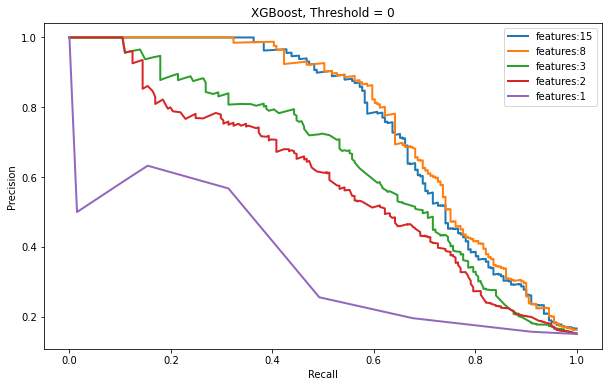

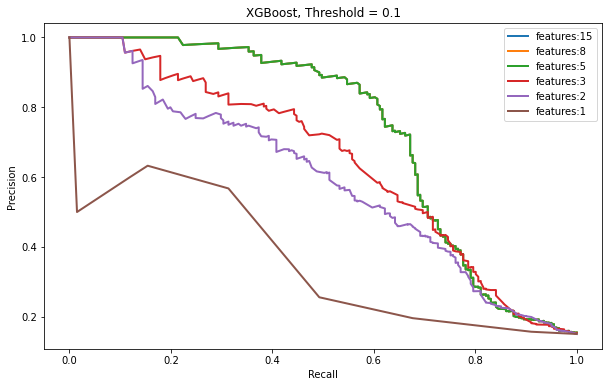

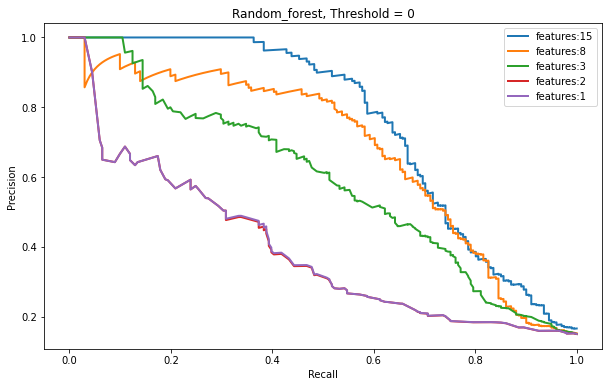

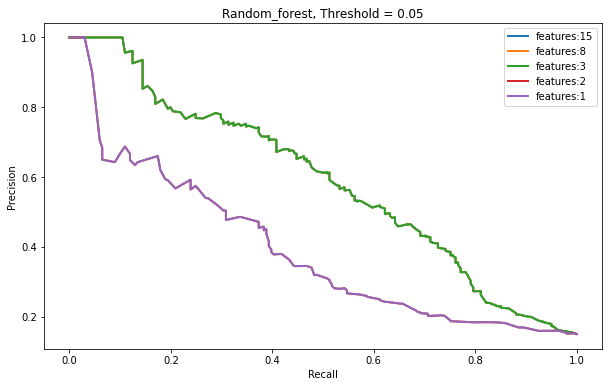

In [654]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve

plt.figure(figsize=(10,6))
for n_f in [15, 8, 3, 2, 1]:
    sfm = SelectFromModel(xgbc, threshold=0, max_features=n_f)
    sfm.fit(X_train, y_train)
    X_train_trans = sfm.transform(X_train)
    xgbc.fit(X_train_trans, y_train)
    precision, recall, _ = precision_recall_curve(y_test, xgbc.predict_proba(sfm.transform(X_test))[:,-1])
    plt.plot(recall, precision, lw=2, label= 'features:'+str(n_f))
    plt.title('XGBoost, Threshold = 0')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
for n_f in [15, 8, 5, 3, 2, 1]:
    sfm = SelectFromModel(xgbc, threshold=0.1, max_features=n_f)
    sfm.fit(X_train, y_train)
    X_train_trans = sfm.transform(X_train)
    xgbc.fit(X_train_trans, y_train)
    precision, recall, _ = precision_recall_curve(y_test, xgbc.predict_proba(sfm.transform(X_test))[:,-1])
    plt.plot(recall, precision, lw=2, label='features:'+str(n_f))
    plt.title('XGBoost, Threshold = 0.1')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
for n_f in [15, 8, 3, 2, 1]:
    sfm = SelectFromModel(rf, threshold=0, max_features=n_f)
    sfm.fit(X_train, y_train)
    X_train_trans = sfm.transform(X_train)
    xgbc.fit(X_train_trans, y_train)
    precision, recall, _ = precision_recall_curve(y_test, xgbc.predict_proba(sfm.transform(X_test))[:,-1])
    plt.plot(recall, precision, lw=2, label= 'features:'+str(n_f))
    plt.title('Random_forest, Threshold = 0')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
plt.legend()
plt.show()
    
plt.figure(figsize=(10,6))
for n_f in [15, 8, 3, 2, 1]:
    sfm = SelectFromModel(rf, threshold=0.1, max_features=n_f)
    sfm.fit(X_train, y_train)
    X_train_trans = sfm.transform(X_train)
    xgbc.fit(X_train_trans, y_train)
    precision, recall, _ = precision_recall_curve(y_test, xgbc.predict_proba(sfm.transform(X_test))[:,-1])
    plt.plot(recall, precision, lw=2, label= 'features:'+str(n_f))
    plt.title('Random_forest, Threshold = 0.05')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
plt.legend()
plt.show()

# Task 3. Bayesian methods (1 point)

In this task you are asked to compare the performance of the common Ridge Regression with its the parameters chosen using cross-validation technique and Bayesian Ridge Regression. 

In particular, using [Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html), find the optimal value for the reguralization coefficient in the ridge regression optimization problem formulation. Then train [Bayesian Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression) and compare the absolute error and learnt coefficients distribution for both variants and make some conclusions on both methods.

**The task:** 
* Use crossvalidation technique to choose the optimal value of reguralization coefficent for Ridge Regression model. (**Note:** "optimal" value here, means the one that lets the model with this particular parameter value achieve better performance compared to the other variants). 
* Fit Bayesian Ridge Regression model 
* Plot the absolute error historgramms for both models using [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html).
* Plot historgrams of coefficients of regression derived from both models (in cross-validation case the coefficients of the best model)
* Compare the two pairs of histrograms. Are they the same or different? Why? What are the prons and cons of both methods?

In [756]:
import sklearn.datasets as dt
from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, BayesianRidge
import seaborn as sns

In [757]:
X,y = dt.load_boston(return_X_y=True)
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]

In [758]:
ridge = Ridge(random_state=0)
params = [{'alpha': [10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]}]
gs = GridSearchCV(estimator=ridge,
                 param_grid=params,
                 scoring = 'neg_mean_absolute_error',
                 cv=5,
                 n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_estimator_)

{'alpha': 100.0}
Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)


In [759]:
ridge = gs.best_estimator_
br = BayesianRidge()
br.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

Ridge regression score:  3.0522967544277693
BayessianRidge score 3.0282857095509


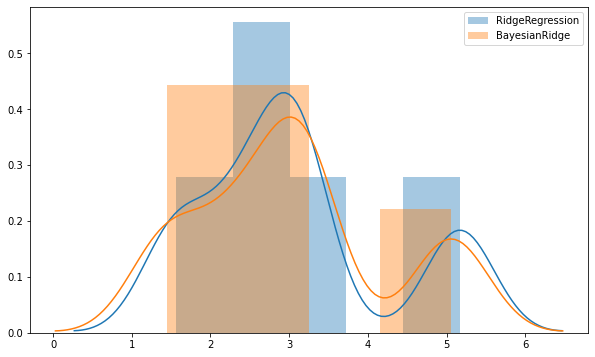

In [761]:
plt.figure(figsize=(10, 6))
cv_results = cv(ridge, X_test, y_test, cv=5, scoring = 'neg_mean_absolute_error')
sns.distplot(-cv_results['test_score'], label='RidgeRegression')

cv_results_ = cv(br, X_test, y_test, cv=5, scoring = 'neg_mean_absolute_error')
sns.distplot(-cv_results_['test_score'], label='BayesianRidge')
plt.legend()
print('Ridge regression score: ',-cv_results['test_score'].mean())
print('BayessianRidge score',-cv_results_['test_score'].mean())

In [762]:
coefs_ridge = ridge.coef_
print(coefs_ridge)
coefs_br = br.coef_
print(br.coef_)

[-0.14888275  0.05523672 -0.02314815  0.46962949 -0.16272483  2.60161722
  0.01175707 -1.08542869  0.47767174 -0.01990551 -0.75290985  0.00796627
 -0.71592035]
[-1.79483965e-01  4.83062164e-02 -6.48498015e-03  1.28391317e+00
 -1.48189484e+00  4.56469503e+00 -4.73541003e-03 -1.12678449e+00
  4.59865919e-01 -1.77565477e-02 -6.83571548e-01  3.81681439e-03
 -5.65914273e-01]


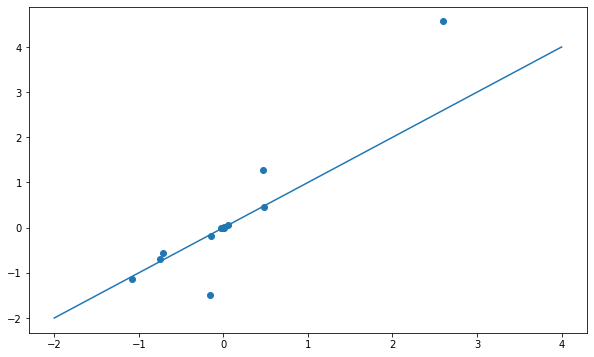

In [763]:
plt.figure(figsize=(10,6))
plt.plot([-2,4],[-2, 4])
plt.scatter(coefs_ridge,coefs_br)

The coefficients do not differ much and lie almost in one line, except fot three outliers. The models perform mostly identically, showing approximately equal metric-based precision. Looking at the cv-histogram we can see that RidgeRegressing at some iteration has shown almost zero error but overall BayessianRidge performed better. The models use different consemptions: Ridge regression uses regularization with L2 norm, while Bayesian regression, is a regression model defined in probabilistic terms, with explicit priors on the parameters. It Ridge is just a regularized classic linear legression, Bayessian regression will perform better in case where gaussian noise is present.

# Task 4. Stacking (2 point)

Stacking is another approach to combine several algorithms to get better results.Basically stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The main concept is to learn base models on some set of features then train meta model, which uses the predictions of base models as features. This technique is wiledly used in multiple real case scenarios to get better results. One of the main problem of stacking is, of course, overfitting. To avoid it, the training set is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models, and $ n $ -th for the overall prediction (calculating the meta-factor). In order to train the meta-model, it should receive predictions from the base models for those objects of the training sample on which the meta-model will be trained. 

There are various of stacking approaches$.^{[1]}$ For example, in order, to obtain meta-factors for test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers. If we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained$.^{[2]}$ You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.s. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer [source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  
[2] MLgroup SHAD

**The task:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models(base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml,features e.t.c) and train them.
* Report individual scores on test set for each of the models. As a score use accuracy.
* Train metaclassifier on original datasets features, report score on test.
* Train meta_classifier on those base models. Report the test score (accuracy) in this case.
* Does stacking helped to gain better score?

Enough of theory, let's get back to Practice. Download dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype) and  split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

In [764]:
import pandas as pd

In [765]:
import sklearn.datasets
fc = sklearn.datasets.fetch_covtype()

In [766]:
X_train, X_test, y_train, y_test = train_test_split(fc.data, fc.target, test_size=0.4,
                                                   random_state=0)

Write meta classifier function.

In [767]:
def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    skf = StratifiedKFold(n_splits=cv)
    train = np.array(list(skf.split(X_train, y_train)))
    X, y = train[:, 0], train[:, 1]
    dataset_blend_train = np.zeros((X_train.shape[0], len(clfs)))
    dataset_blend_test = np.zeros((X_test.shape[0], len(clfs)))

    for j, clf in enumerate(base_clfs):
        for i, (train, test) in enumerate(zip(X, y)):
            X_train_ = X_train[train]
            y_train_ = y_train[train]
            X_test_ = X_train[test]
            y_test_ = y_train[test]
            clf.fit(X_train_, y_train_)
            y_pred = clf.predict(X_test_)
            dataset_blend_train[test, j] = y_pred

        y_small_preds_test = clf.predict(X_test)
        dataset_blend_test[:, j] = y_small_preds_test        
        print('clf №'+str(j+1)+'trained')
        
        
    final_classifier.fit(dataset_blend_train, y_train)
    y_preds = final_classifier.predict(dataset_blend_test)
    
    return y_preds, final_classifier

Chose 6 different base models(base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml,features e.t.c) and train them. 

In [770]:
###YOUR CODE###
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(fc.data, fc.target, test_size=0.4,
                                                   random_state=0)

clf1 = ExtraTreesClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
clf2 = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf3 = ExtraTreesClassifier(n_estimators=100, n_jobs=-1)
clf4 = RandomForestClassifier(n_estimators=150, max_depth=10, n_jobs=-1)
clf5 = XGBClassifier(n_estimators=150, max_depth=10, n_jobs=-1)
clf6 = XGBClassifier(n_estimators=200, max_depth=10, n_jobs=-1)
final = XGBClassifier(n_jobs=-1)
clfs = [clf1, clf2, clf3, clf4, clf5, clf6]

for i, clf in enumerate(clfs):
    
    clf.fit(X_train, y_train)
    print('clf ',i+1 ,' - trained')

clf  1  - trained
clf  2  - trained
clf  3  - trained
clf  4  - trained
clf  5  - trained
clf  6  - trained


Report individual scores on test set. As a score use accuracy.

In [772]:
for i, clf in enumerate(clfs):
    print('clf №'+str(i+1)+' score:', accuracy_score(clf.predict(X_test), y_test))

clf №1 score: 0.623768851788903
clf №2 score: 0.9488479163529184
clf №3 score: 0.9481938856737161
clf №4 score: 0.7510122415610679
clf №5 score: 0.912729932660657
clf №6 score: 0.9273380521073127


Train metaclassifier on original datasets features. And report score on test.

In [773]:
final.fit(X_train, y_train)
print('metaclassifier score:', accuracy_score(final.predict(X_test), y_test))

metaclassifier score: 0.7460811944665562


Train meta_classifier on those base models .

In [774]:
predictions, final_clf = meta_classifier(base_clfs=clfs, final_classifier=final, X_train=X_train,
                      X_test = X_test, y_train = y_train, cv=5)

clf №1trained
clf №2trained
clf №3trained
clf №4trained
clf №5trained
clf №6trained


Report score(accuracy) on test. 

In [775]:
print('stacking score: ', accuracy_score(predictions, y_test))

stacking score:  0.9484262386781696


Does stacking helped to gain better score?

Your answer

It helped to achieve more accuracy for the final classifier. Initial accuracy: 0.746, stacking accuracy: 0.948. But looking at the accuracies of base classifiers, we can see that RandomForest and ExtraTrees classifiers reached 0.948 and 0.949 accuracy scores respectively(which is appoximetely equal to stacking accuracy) meaning that in our situatin stacking procedure was only waste of time and just one model would have been sufficient.

But generally, stacking is one of the straight ways to increase the model's performance with computational speed traid-off. For example, as far as I know, XGBoost stacking is one of the most popular kaggle competitions winning method.

# Task 5. Gaussian Processes (1 point)

In the following exercise you will need to fit the gaussian process with different kernels on the ```elecricity_conpumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [832]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [833]:
data = pd.read_csv('data/elecricity_conpumption_FR.csv')

In [834]:
data.dropna(inplace=True)

In [835]:
y = np.array(data.values)
X = np.array(data.index)

In [836]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.

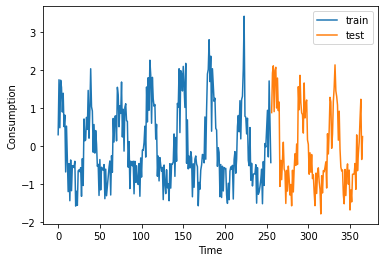

In [837]:
###YOUR CODE###
std = StandardScaler()
std.fit(y_train)
y_train_std = std.transform(y_train)
y_test_std = std.transform(y_test)
plt.plot(X_train, y_train_std, label='train')
plt.plot(X_test, y_test_std, label='test')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

In [838]:
import GPy
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear,PeriodicExponential
from sklearn.metrics import r2_score

* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

r2 score:  0.721178589688803


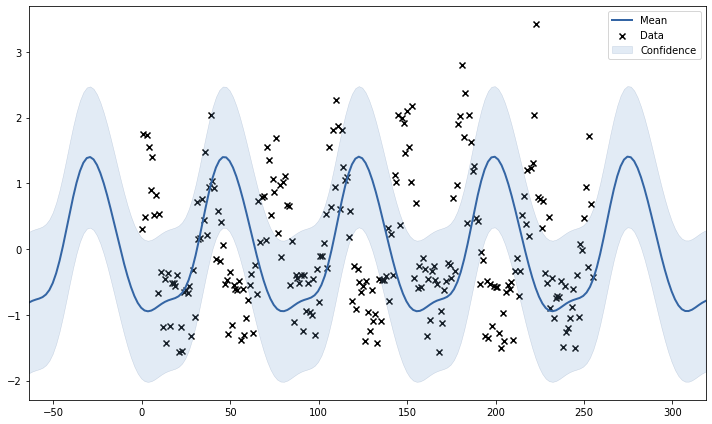

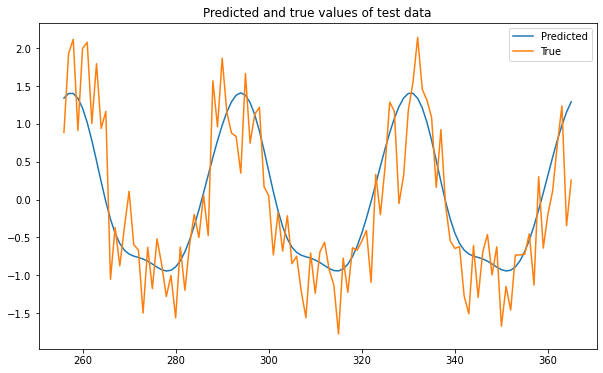

In [895]:
kernel_1 = Poly(1, order=2) + White(1)
kernel_2 = StdPeriodic(1)*RBF(1)


kernel = (kernel_1 + kernel_2)

model = GPRegression(X_train, y_train_std, kernel, normalizer=False)
model.optimize()
model.plot(figsize=(10, 6),titles='Mean and confidence interval of the prediction')
y_pred = model.predict(X_test)[0]

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_pred, label='Predicted')
plt.plot(X_test, y_test_std, label='True')
plt.title('Predicted and true values of test data')
plt.legend()
plt.plot()
print('r2 score: ', r2_score(y_test_std, y_pred))